In [49]:
import pandas as pd
df = pd.read_csv("airline/train.csv")

In [51]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [52]:
# df.dropna(inplace=True)

In [53]:
print(df["satisfaction"].unique())

['neutral or dissatisfied' 'satisfied']


In [54]:
df["satisfaction"] = df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0}) # 만족도: 만족 1, 중립 또는 불만족 0

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

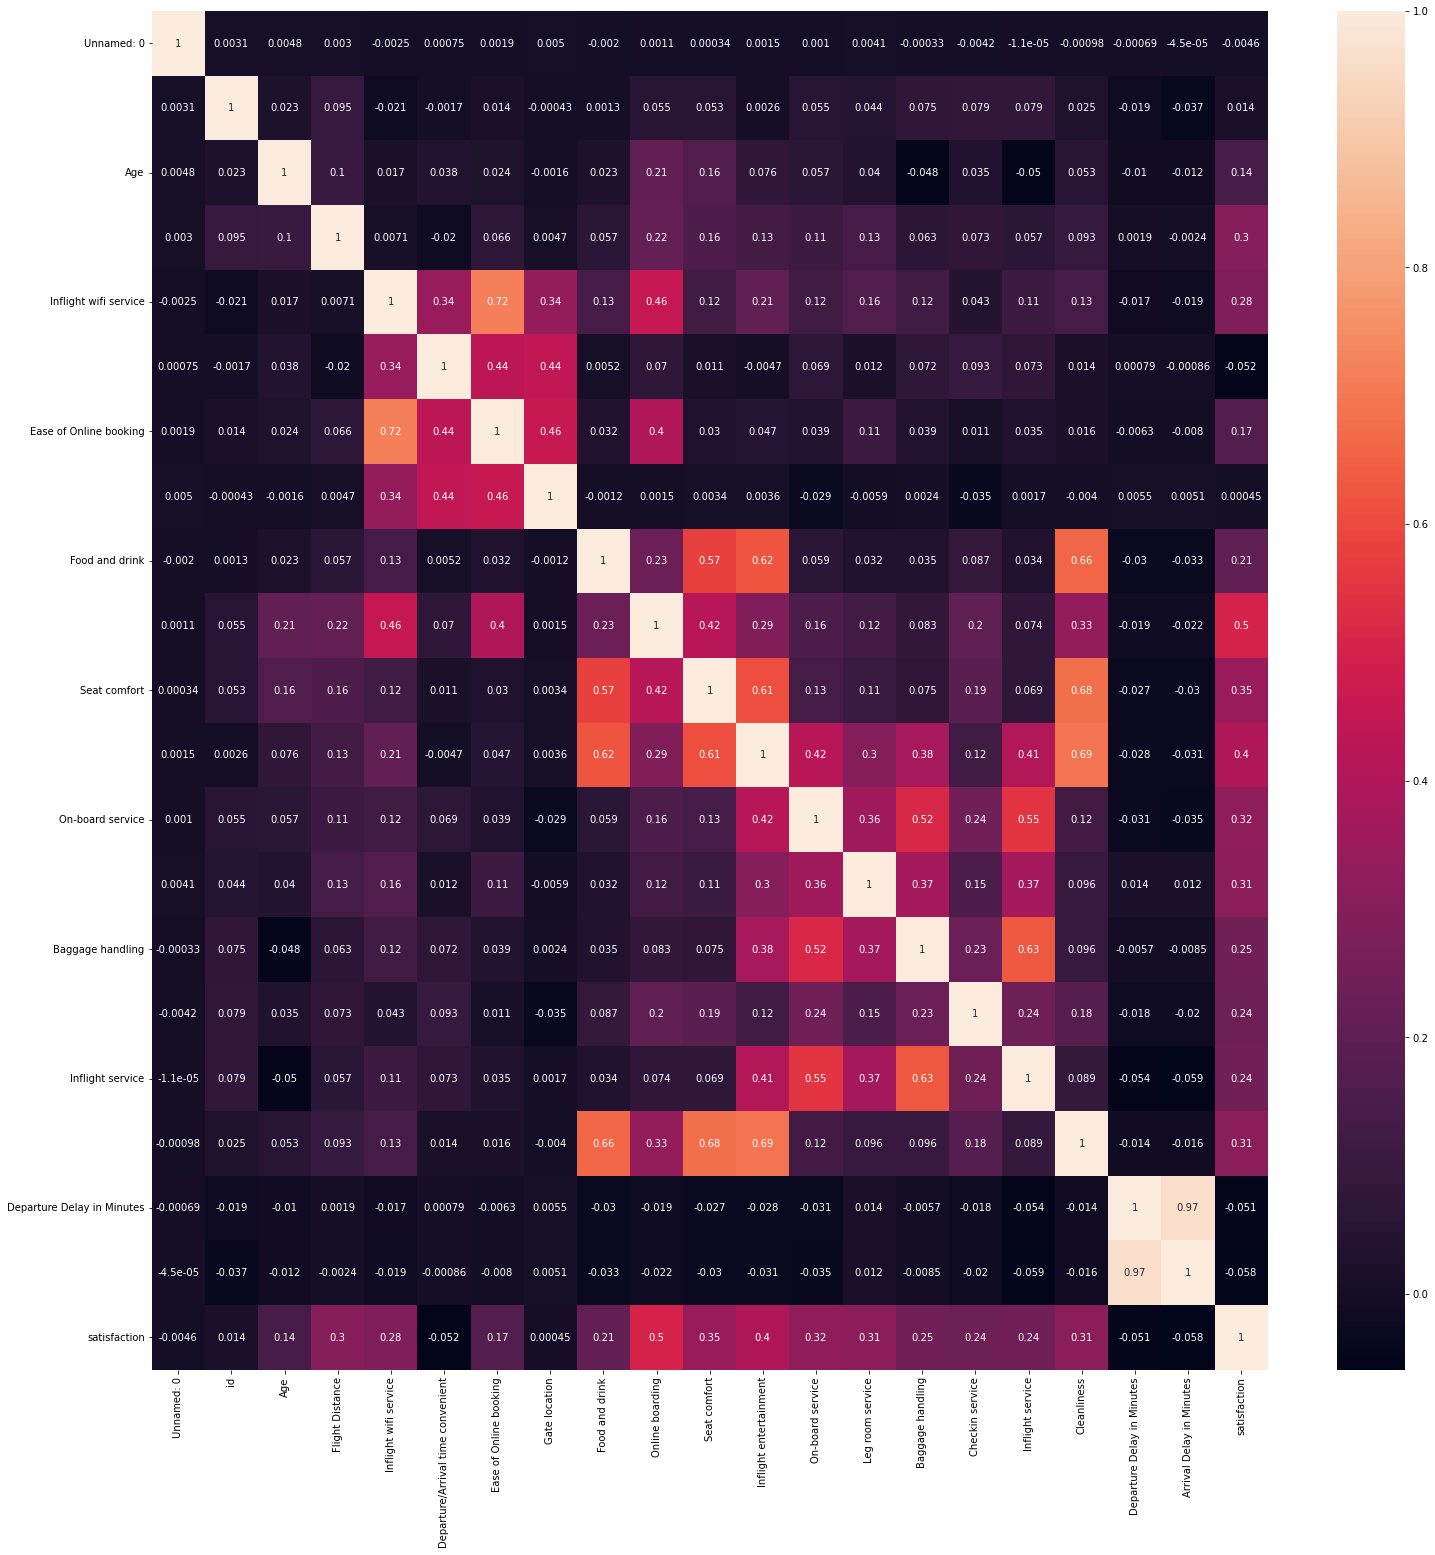

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(train_df.corr(), annot=True)
plt.gcf().set_size_inches(25, 25)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

# 시각화

In [178]:
x_data = df[['Gate location', 'Inflight wifi service']] # 82
y_data = df['satisfaction']

In [180]:
import numpy as np

import sklearn
from sklearn import *
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# model= sklearn.tree.DecisionTreeClassifier(max_depth=10,random_state=0)
model.fit(x_data, y_data)
pred = model.predict(x_data)
print("분류 정확도 : ", sklearn.metrics.accuracy_score(y_data, pred))
# print(pred)

# print(x_data)
x_test = pd.DataFrame({'Gate location':[1, 5, 2, 4],
                    'Inflight wifi service':[2, 5, 3, 4]})

print("만족여부 : ", model.predict(x_test))

분류 정확도 :  0.8201633299225823
만족여부 :  [0 1 0 1]


분류 정확도 :  0.7423982083904473
만족여부 :  [1 0 0 1 0]


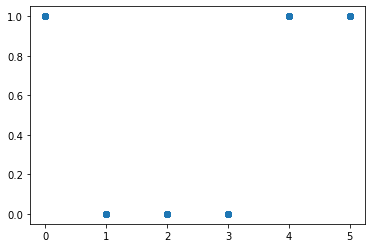

In [176]:
import numpy as np

x_data = np.array(df['Inflight wifi service']) # 82
y_data = np.array(df['satisfaction'])

x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)


import sklearn
from sklearn import *
model= sklearn.tree.DecisionTreeClassifier(max_depth=10,random_state=0)
model.fit(x_data, y_data)
pred = model.predict(x_data)
print("분류 정확도 : ", sklearn.metrics.accuracy_score(y_data, pred))
# print(pred)

# print(x_data)
x_test = np.array([[5], [2], [3], [4], [2.5]])

print("만족여부 : ", model.predict(x_test))

plt.scatter(x_data, pred)

# 항공사 승객 만족도 예측 - Logistic Regression

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [123]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(x_train, y_train)

print(model_lin.score(x_test, y_test))

lin_pred = model_lin.predict(x_test)
print(lin_pred)

0.5483303611807131
[ 0.87836683  0.74502029  0.00205505 ...  0.02655313  0.81181411
 -0.39322627]


In [130]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=10)

model_log.fit(x_train,y_train)

print(model_log.score(x_test, y_test))

log_pred = model_log.predict(x_test)
print(log_pred)

0.8714324334762291
[1 1 0 ... 0 1 0]


# 분류 - DecisionTree

In [125]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()  # 랜덤포레스트 분류 모델 생성

model_rf.fit(x_train,y_train)

print("RandomForest 훈련 세트 정확도: {:.3f}".format(model_rf.score(x_train, y_train)))
print("RandomForest 테스트 세트 정확도: {:.3f}".format(model_rf.score(x_test, y_test)))

rf_pred = model_rf.predict(x_test)
print(rf_pred)

RandomForest 훈련 세트 정확도: 1.000
RandomForest 테스트 세트 정확도: 0.963
[1 1 0 ... 0 1 0]


In [126]:
rf_pred

array([1, 1, 0, ..., 0, 1, 0])

In [131]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(x_train, y_train)
print("Decision tree 훈련 세트 정확도: {:.3f}".format(dec_tree.score(x_train, y_train)))
print("Decision tree 테스트 세트 정확도: {:.3f}".format(dec_tree.score(x_test, y_test)))

rf_pred = model_rf.predict(x_test)
print(rf_pred)

Decision tree 훈련 세트 정확도: 1.000
Decision tree 테스트 세트 정확도: 0.947
[1 1 0 ... 0 1 0]


# 군집화 - Kmeans

## 영호오빠 코드 쎄비지했다..!

[2 2 0 ... 3 0 3]
응집도 추출:  6938508869.11204


Text(0, 0.5, 'pca_y')

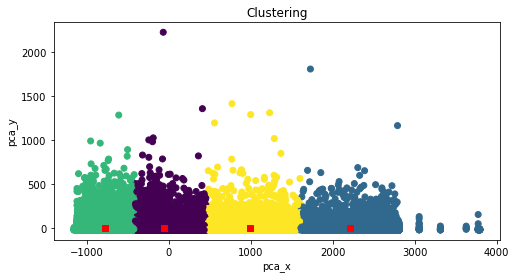

In [128]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

############ 군집화

# k값 구하기
ks = range(1, 10)  # 중심점 몇 개를 가질 것인가?, 기준을 내가 정해야하는데 기준에 대한 근거가 없음. 
intertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=5)
    model.fit(train_df)
    intertias.append(model.inertia_)

# # k값 찾기 그래프 엘보우플롯?
# plt.figure(figsize=(8, 4))
# plt.plot(ks, intertias, '-o')
# plt.title('Elbow Method')
# plt.xlabel('1 to 10')
# plt.ylabel('intertias')
# 이거를 통해 4개의 중심점이 괜찮다고 판단함

# 차원 축소 - 변수 컬럼을 줄이는 것임. 예측할 값의 y값이 하나면 영향을 끼치는 변수가 여러 개인데 이 변수를 줄이는 것임.
pca = PCA(n_components=2) # 주성분 분석으로 차원 축소
pca_transformed = pca.fit_transform(train_df)

train_df['pca_x'] = pca_transformed[:,0]
train_df['pca_y'] = pca_transformed[:,1]

# 군집
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_transformed)
print(kmeans.labels_)
print("응집도 추출: ", kmeans.inertia_)

# 군집화 중심점
center = kmeans.cluster_centers_
# print('센타', center)

# df에 군집결과 넣기
train_df['cluster'] = kmeans.labels_


# 군집 결과 시각화
plt.figure(figsize=(8, 4))
plt.scatter(train_df['pca_x'], train_df['pca_y'], c=train_df['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='s')
plt.title('Clustering')
plt.xlabel('pca_x')
plt.ylabel('pca_y')

[1 2 1 ... 3 3 1]
응집도 추출:  1749833239.3860083


Text(0, 0.5, 'pca_y')

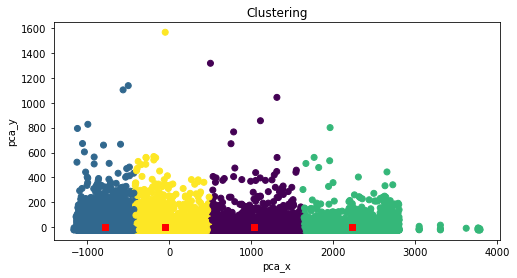

In [129]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

############ 군집화

# k값 구하기
ks = range(1, 10)
intertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=5)
    model.fit(test_df)
    intertias.append(model.inertia_)

# # k값 찾기 그래프 엘보우플롯?
# plt.figure(figsize=(8, 4))
# plt.plot(ks, intertias, '-o')
# plt.title('Elbow Method')
# plt.xlabel('1 to 10')
# plt.ylabel('intertias')

# 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(test_df)

test_df['pca_x'] = pca_transformed[:,0]
test_df['pca_y'] = pca_transformed[:,1]

# 군집
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_transformed)
print(kmeans.labels_)
print("응집도 추출: ", kmeans.inertia_)

# 군집화 중심점
center = kmeans.cluster_centers_
# print('센타', center)

# df에 군집결과 넣기
test_df['cluster'] = kmeans.labels_


# 군집 결과 시각화
plt.figure(figsize=(8, 4))
plt.scatter(test_df['pca_x'], test_df['pca_y'], c=test_df['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='s')
plt.title('Clustering')
plt.xlabel('pca_x')
plt.ylabel('pca_y')

# 다시해보자!

In [96]:
import pandas as pd
test_df = pd.read_csv("airline/test.csv")
train_df = pd.read_csv("airline/train.csv")

In [97]:
print(train_df.info())

print(train_df.isnull().sum())
print(test_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [98]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [99]:
print(train_df["Gender"].unique())
print(train_df["Customer Type"].unique())
print(train_df["satisfaction"].unique())
print(train_df["Type of Travel"].unique())
print(train_df["Class"].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['neutral or dissatisfied' 'satisfied']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']


In [100]:
def dropds(df):
    df.drop(["Unnamed: 0","id"],axis=1,inplace=True)  # Unnamed: 0, id, Class 컬럼 지우기
    df["Gender"] = df["Gender"].map({"Male":1,"Female":0})  # 성별: 남자 1, 여자 0
    df["Customer Type"] = df["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})  # 고객유형: 충성고객 1, 비충성고객 0
    df["satisfaction"] = df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0}) # 만족도: 만족 1, 중립 또는 불만족 0
    df["Type of Travel"] = df["Type of Travel"].map({"Personal Travel":1,"Business travel":0}) # 여행유형: 개인여행 1, 출장 0
    df["Class"] = df["Class"].map({"Business":2, "Eco Plus":1,"Eco":0})  # 성별: 남자 1, 여자 0

dropds(train_df)
dropds(test_df)

In [101]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

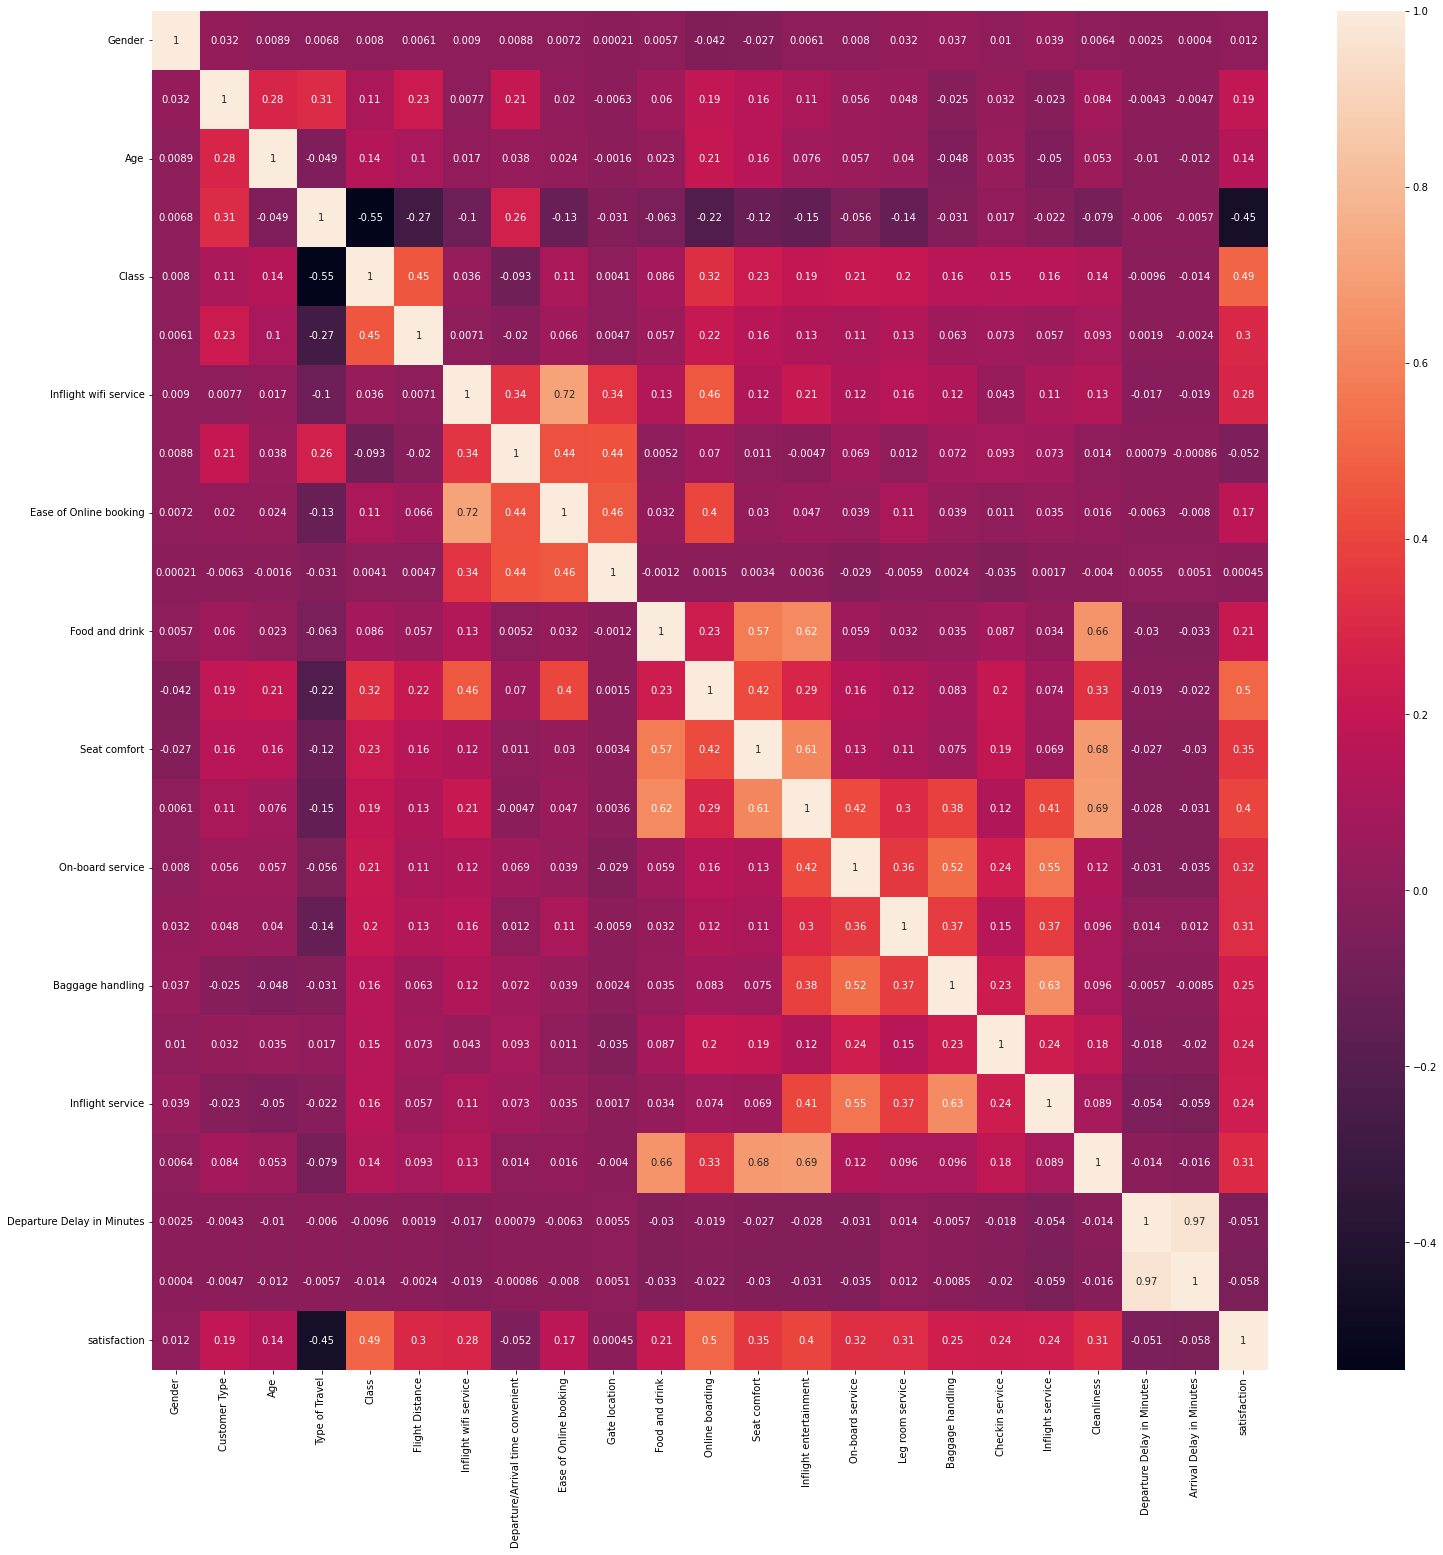

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(train_df.corr(), annot=True)
plt.gcf().set_size_inches(25, 25)

In [131]:
train_df = train_df.sort_values('Flight Distance')
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
87950,0,1,17,1,0,31,2,4,0,3,...,1,4,3,5,4,5,1,11,11.0,0
24808,0,1,54,1,0,31,2,1,2,3,...,5,5,2,5,3,5,2,18,22.0,0
73362,0,1,22,1,0,31,2,5,2,3,...,5,3,2,4,5,4,5,0,0.0,0
69088,0,1,12,1,0,31,3,4,3,4,...,1,1,1,2,5,1,1,12,8.0,0
90531,0,0,26,0,0,31,4,0,4,1,...,3,5,3,5,5,2,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,0,1,29,1,0,4983,2,4,2,5,...,2,2,4,4,4,3,4,6,0.0,0
74837,0,1,37,0,2,4983,2,3,2,2,...,3,1,5,1,4,3,4,0,2.0,1
95982,0,1,62,1,1,4983,3,2,3,3,...,2,1,3,4,4,1,4,0,0.0,0
2847,0,1,63,1,2,4983,0,5,0,2,...,3,2,4,3,1,5,1,3,0.0,1


In [132]:
import numpy as np

x_train = np.array(train_df['Flight Distance'])
satisfaction = np.array(train_df['satisfaction'])

x_train = x_train.reshape(-1,1)
satisfaction = satisfaction.reshape(-1,1)

print(Flight_Distance)
print(satisfaction)

[[  31]
 [  31]
 [  31]
 ...
 [4983]
 [4983]
 [4983]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [133]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state = 0, solver='liblinear')

model_log.fit(Flight_Distance,satisfaction)

print(model_log.score(Flight_Distance, satisfaction))

train_df = train_df.sort_values('Flight Distance')
x_test = np.array(train_df['Flight Distance'])
x_test = x_test.reshape(-1, 1)


log_pred = model_log.predict(x_test)
print(log_pred)

0.660308512075989
[0 0 0 ... 1 1 1]


/Users/oow214/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


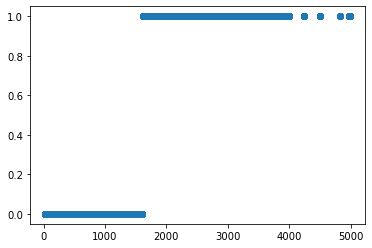

In [142]:
import matplotlib.pyplot as plt
# plt.scatter(Flight_Distance, satisfaction)
plt.scatter(x_test, log_pred)
# plt.plot(x_test, log_pred, "-o", lw=1, label="예측")

In [144]:
train_df = train_df.sort_values('Flight Distance')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 87950 to 18434
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1

In [ ]:
import numpy as np

x_train = np.array(train_df['Flight Distance'])
satisfaction = np.array(train_df['satisfaction'])

x_train = x_train.reshape(-1,1)
satisfaction = satisfaction.reshape(-1,1)

print(Flight_Distance)
print(satisfaction)